In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Loading and Initial Inspection

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/brain stroke train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/brain stroke test.csv")
sub_df = pd.read_csv("/content/drive/MyDrive/sample_submission.csv")

In [ ]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [ ]:
train_df['stroke'].unique()

array([0, 1])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.3+ MB


In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15304.0,41.417708,21.444673,0.08,26.0,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.0,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.0,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.9,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.5,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.0,0.00,0.00,1.0


In [ ]:
train_df.nunique()

,0
gender,3
age,106
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3740
bmi,407
smoking_status,4


In [ ]:
train_df.duplicated().sum()

0

#Data Cleaning and Preprocessing

In [ ]:
sorted(train_df['age'].unique().tolist())[0:12]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.68, 0.72, 0.8, 0.88]

In [ ]:
train_df['age'] = np.ceil(train_df['age'])
test_df['age'] = np.ceil(test_df['age'])

In [ ]:
train_df['gender'].value_counts()

,count
gender,
Female,9446
Male,5857
Other,1


In [ ]:
train_df = train_df.drop(train_df[train_df['gender'] == 'Other'].index)
test_df = test_df.drop(test_df[test_df['gender'] == 'Other'].index)

In [ ]:
train_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [ ]:
test_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
...,...,...,...,...,...,...,...,...,...,...
10199,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked
10200,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown
10201,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown
10202,Male,31.0,0,0,Yes,Private,Urban,82.41,28.7,never smoked


**EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

sns.set_style("darkgrid")

In [ ]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

In [ ]:
# I filter  ddata for stroke and non Stroke
no_stroke_data = train_df[train_df['stroke'] == 0 ]
stroke_data = train_df[train_df['stroke'] == 1 ]

In [ ]:
stroke_count = train_df['stroke'].value_counts()   # for univariet analysis

In [ ]:
stroke_count

,count
stroke,
0,14671
1,632


In [ ]:
fig = px.pie(
    stroke_count, values=stroke_count.values, names=['No', 'Yes'],
    title = 'Proportion of Stroke Cases',
    color_discrete_sequence=plot_color)

fig.update_layout(legend_title_text = 'Stroke Status', title_x=0.8, title_y = 0.95)
fig.show()

In [ ]:
# bivariate analysis
def custom_historgram(columns:str, titles:list)->go.Figure:
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles = ['No Stroke', 'Yes Stroke'])
    histogram_no_stroke = px.histogram(no_stroke_data, x = columns, color_discrete_sequence=['#008080'])
    histogram_stroke = px.histogram(stroke_data, x = columns, color_discrete_sequence=['black'])
    fig.add_trace(histogram_no_stroke['data'][0], row=1, col=1)
    fig.add_trace(histogram_stroke['data'][0], row=1, col=2)
    fig.update_layout(title = titles[0], title_x = 0.5)
    fig.update_xaxes(title_text = titles[1])
    fig.update_yaxes(title_text = 'Count')
    return fig

In [ ]:
fig = custom_historgram('avg_glucose_level', ['Average Glucose Level Distribution by Stroke', 'Average Glucose Level'])
fig.show()

In [ ]:
fig = custom_historgram('age', ['Age Distribution by stroke', 'Age'])
fig.show()

In [ ]:
stroke_data['bmi'].mean()

30.230696202531643

In [ ]:
no_stroke_data['bmi'].mean()

28.02217163110899

In [ ]:
fig = px.violin(train_df, y = 'bmi', x='stroke', box=True, width=700, height=500, color_discrete_sequence=plot_color,title='BMI & Stroke Status', labels={'stroke': 'Stroke Status', 'bmi': 'BMI'})
fig.update_layout(title_x = 0.3, title_y = 0.9)
fig.show()

In [ ]:
train_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

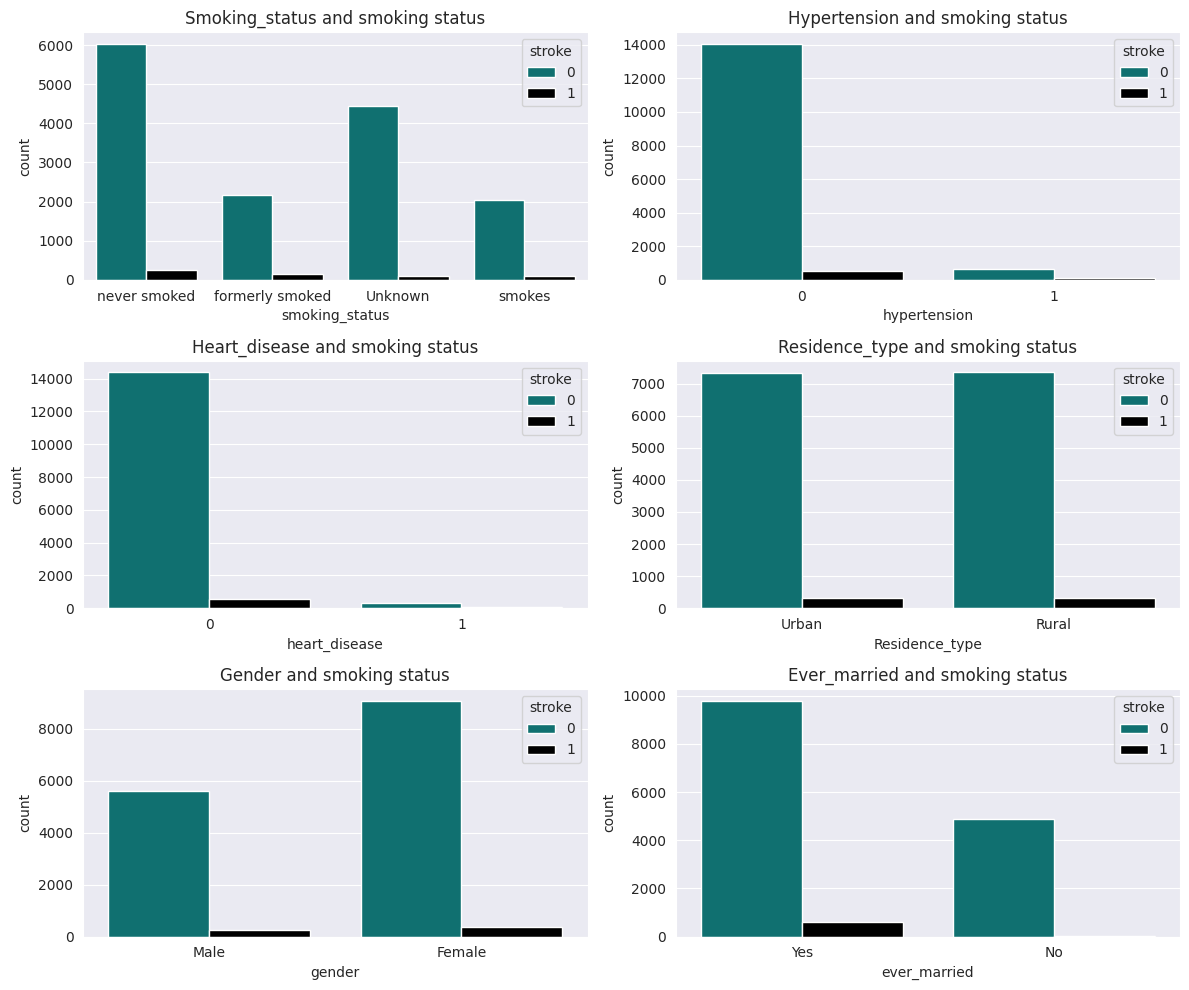

In [ ]:
x_values = ['smoking_status', 'hypertension', 'heart_disease','Residence_type','gender', 'ever_married']
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(12, 10))

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data = train_df, x = x_value, hue='stroke', ax = ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')

plt.tight_layout()
plt.show()

**# Data Preparation & Preprocessing**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(display = 'diagram')

In [ ]:
train_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
input_cols = list(train_df.columns)[1:-1]

In [ ]:
target_col = 'stroke'

In [ ]:
input_cols

['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [ ]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

test_inputs = test_df[input_cols].copy()

In [ ]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()

In [ ]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [ ]:
categorical_cols = train_inputs.select_dtypes(include='object').columns.to_list()

In [ ]:
categorical_cols

['ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
categorical_cols.remove('smoking_status')

In [ ]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [ ]:
ordinal_enc = OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked','smokes']])

In [ ]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
preprocessor = ColumnTransformer([
    ('Ordinal_Encode', ordinal_enc,['smoking_status']),
    ('OneHot_Encode', onehot_enc,categorical_cols)])

In [ ]:
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['ever_married', 'work_type',
                                  'Residence_type'])])

In [ ]:
encoded_cols = list(preprocessor.get_feature_names_out())

In [ ]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

In [ ]:
train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [ ]:
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

X_test = test_inputs[numerical_cols + encoded_cols]

In [ ]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encode__ever_married_No,OneHot_Encode__ever_married_Yes,OneHot_Encode__work_type_Govt_job,OneHot_Encode__work_type_Never_worked,OneHot_Encode__work_type_Private,OneHot_Encode__work_type_Self-employed,OneHot_Encode__work_type_children,OneHot_Encode__Residence_type_Rural,OneHot_Encode__Residence_type_Urban
0,28.0,0,0,79.53,31.1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_train.shape[1] == X_test.shape[1]

True

**Split Dataset into training and validation set**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(12242, 15)

**Baseline Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




In [ ]:
models = [
    (LogisticRegression(), 'LogisticRegression'),
    (RandomForestClassifier(), 'RandomForestClassifier'),
    (XGBClassifier(), 'XGBClassifier'),
    (LGBMClassifier(verbose = 1), 'LightGBM'),
    (DecisionTreeClassifier(),'DecisionTreeClassifier' )]

#Model Evaluation and Metrics

In [ ]:
def evalue_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)
    confusion_mat = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return confusion_mat, accuracy, precision, recall, f1

In [ ]:
confusion_mats = {}
def metric_df(model, model_name):
    confusion_mat, *df = evalue_model(model, X_train, y_train, X_val, y_val)
    confusion_mats[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuarcy','Precision', 'Recall', 'F1'])
    model_metrics.insert(0, 'Model', model_name)

    return model_metrics

In [ ]:
predictions = []
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [ ]:
predictions

[                Model  Accuarcy  Precision    Recall        F1
 0  LogisticRegression  0.955243   0.333333  0.022388  0.041958,
                     Model  Accuarcy  Precision    Recall        F1
 0  RandomForestClassifier  0.953283   0.285714  0.044776  0.077419,
            Model  Accuarcy  Precision    Recall       F1
 0  XGBClassifier  0.951976    0.30303  0.074627  0.11976,
       Model  Accuarcy  Precision    Recall        F1
 0  LightGBM  0.954263   0.363636  0.059701  0.102564,
                     Model  Accuarcy  Precision    Recall        F1
 0  DecisionTreeClassifier  0.930088   0.226027  0.246269  0.235714]

#Handle Imbalanced Data with SMOTE

In [ ]:
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

In [ ]:
X_train_ns.shape

(23488, 15)

In [ ]:
lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_ns, y_train_ns)
lr_with_smote_mat = metric_df(lr_with_smote, 'Logistic With SMOTE')
predictions.append(lr_with_smote_mat)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
rfc_with_smote = RandomForestClassifier()
rfc_with_smote.fit(X_train_ns, y_train_ns)
rfc_with_smote_mat = metric_df(rfc_with_smote, 'RandomForestClassifier With SMOTE')
predictions.append(rfc_with_smote_mat)

In [ ]:
dtc_with_smote = DecisionTreeClassifier()
dtc_with_smote.fit(X_train_ns, y_train_ns)
dfc_with_smote_mat = metric_df(dtc_with_smote, 'DecisionTreeClassifier With SMOTE')
predictions.append(dfc_with_smote_mat)

In [ ]:
xgb_with_smote = XGBClassifier()
xgb_with_smote.fit(X_train_ns, y_train_ns)
xgb_with_smote_mat = metric_df(xgb_with_smote, 'XGB With SMOTE')
predictions.append(xgb_with_smote_mat)

In [ ]:
lgb_with_smote = LGBMClassifier()
lgb_with_smote.fit(X_train_ns, y_train_ns)
lgb_with_smote_mat = metric_df(xgb_with_smote, 'LGBMClassifier With SMOTE')
predictions.append(lgb_with_smote_mat)

[LightGBM] [Info] Number of positive: 11744, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2822
[LightGBM] [Info] Number of data points in the train set: 23488, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
for model_name , confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)
    print()

Confusion Matrix for LogisticRegression
[[2921    6]
 [ 131    3]]

Confusion Matrix for RandomForestClassifier
[[2912   15]
 [ 128    6]]

Confusion Matrix for XGBClassifier
[[2904   23]
 [ 124   10]]

Confusion Matrix for LightGBM
[[2913   14]
 [ 126    8]]

Confusion Matrix for DecisionTreeClassifier
[[2814  113]
 [ 101   33]]

Confusion Matrix for Logistic With SMOTE
[[2328  599]
 [  32  102]]

Confusion Matrix for RandomForestClassifier With SMOTE
[[2894   33]
 [ 119   15]]

Confusion Matrix for DecisionTreeClassifier With SMOTE
[[2798  129]
 [ 104   30]]

Confusion Matrix for XGB With SMOTE
[[2886   41]
 [ 116   18]]

Confusion Matrix for LGBMClassifier With SMOTE
[[2886   41]
 [ 116   18]]



In [ ]:
prediction_base = pd.concat(predictions)
prediction_base

,Model,Accuarcy,Precision,Recall,F1
0,LogisticRegression,0.955243,0.333333,0.022388,0.041958
0,RandomForestClassifier,0.953283,0.285714,0.044776,0.077419
0,XGBClassifier,0.951976,0.303030,0.074627,0.119760
0,LightGBM,0.954263,0.363636,0.059701,0.102564
0,DecisionTreeClassifier,0.930088,0.226027,0.246269,0.235714
0,Logistic With SMOTE,0.793858,0.145506,0.761194,0.244311
0,RandomForestClassifier With SMOTE,0.950343,0.312500,0.111940,0.164835
0,DecisionTreeClassifier With SMOTE,0.923881,0.188679,0.223881,0.204778
0,XGB With SMOTE,0.948710,0.305085,0.134328,0.186528
0,LGBMClassifier With SMOTE,0.948710,0.305085,0.134328,0.186528


In [ ]:
models_to_plot = [
    'LogisticRegression',
    'RandomForestClassifier',
    'XGBClassifier',
    'LightGBM',
]


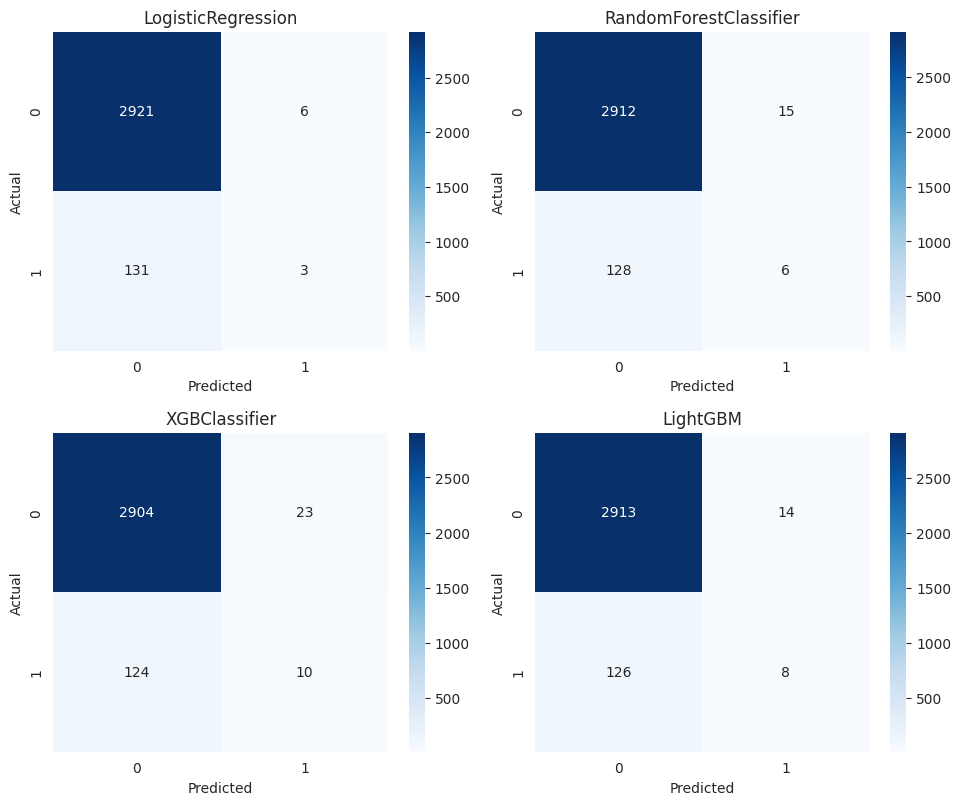

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (10, 8))
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap = 'Blues', ax = ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left=0, right = 0.9, top =0.9, bottom = 0)
plt.show()

In [ ]:
preds=pd.DataFrame(sub_df).to_csv("submission.csv", index=None)

In [ ]:
sub_df = pd.read_csv("submission.csv")
sub_df.head()

,id,stroke
0,15304,0.041296
1,15305,0.041296
2,15306,0.041296
3,15307,0.041296
4,15308,0.041296


In [ ]:
# Make Prediction on a single input

sub_df['stroke'] = preds

In [ ]:
sub_df

,id,stroke
0,15304,None
1,15305,None
2,15306,None
3,15307,None
4,15308,None
...,...,...
10199,25503,None
10200,25504,None
10201,25505,None
10202,25506,None


In [ ]:
train_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
single_input = {
    'gender': 'Male',
    'age': 33,
    'hypertension':0,
    'heart_disease': 0,
    'ever_married':'Yes',
    'work_type':'Private',
    'Residence_type':'Urban',
    'avg_glucose_level':79.53,
    'bmi': 31.10,
    'smoking_status': 'formerly smoked'
}

In [ ]:
input_df = pd.DataFrame([single_input])

In [ ]:
input_df[encoded_cols] = preprocessor.transform(input_df)

In [ ]:
X = input_df[numerical_cols + encoded_cols]

In [ ]:
lr_with_smote.predict(X)


array([0])

In [ ]:
dtc_with_smote.predict(X)

array([0])

In [ ]:
xgb_with_smote.predict(X)

array([0])

In [ ]:
rfc_with_smote.predict(X)

array([0])

In [ ]:
lgb_with_smote.predict(X)

array([0])

#Model Saving and Flask API for Deployment

In [ ]:
import joblib

In [ ]:
models_with_smote = {
    'LogisticRegression With SMOTE': lr_with_smote,
    'RandomForestClassifier With SMOTE': rfc_with_smote,
    'XGBClassifier With SMOTE': xgb_with_smote,
    'LightGBM With SMOTE': lgb_with_smote
}

In [ ]:
model_data = {
    'encoded_cols': encoded_cols,
    'numeric_cols': numerical_cols,
    'preprocessor': preprocessor,
    'models_with_smote': models_with_smote
}

In [ ]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [ ]:
!pip install flask flask-ngrok


In [ ]:
!ls


drive  model.joblib  sample_data  submission.csv


In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok

app = Flask(__name__)  # Create a Flask app instance

run_with_ngrok(app)  # Now you can use 'app'